This was my initial attempt at produce an order of magnitude estimate of the number of neutrinos we could detect that were produced by cosmic rays hitting the moon

However, we ultimately decided these results were flawed so I tried again, more carefully 

In [24]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad
import math
from scipy.interpolate import interp1d
%run /Users/akivasherin/Desktop/Summer_Reasearch/PhysNotebooks/neutrino_oscillations_through_moon.ipynb
import pandas as pd

In [5]:
def get_deepcore_aeff():
    muon_energies = [
        11.619577203870600,
        15.386969895456000,
        20.766968750606900,
        28.039471640494000,
        37.11554934589390,
        48.68802823625820,
        65.73107111319280,
        86.2353235660652,
        117.59456183692200,
        157.26760623242400,
        210.31742215028200,
        289.4525549775690,
        372.34496424347900,
        488.33223225073700,
        665.5681432747510,
        881.2987936753920,
        1248.3595007072500,
        1515.0327404078400,
        2167.103130150640,
        2814.1300318323800,
        3909.8387559125200,
        5126.444981904390,
        6785.569503835040,
        9069.457440806710,
        12121.608311358900
    ]
    muon_aeffs = [
        0.0000428730033665452,
        0.00007880462815669940,
        0.00011721022975334800,
        0.00023324701361610800,
        0.00032044029762451700,
        0.0006903676932864000,
        0.0012689610031679200,
        0.002959813643842190,
        0.007088832467204200,
        0.015272426579169000,
        0.03204402976245170,
        0.055863280664316200,
        0.1000000000000000,
        0.18380944176677900,
        0.3039195382313200,
        0.5298316906283700,
        0.8308836821639960,
        1.2035378976219000,
        2.0433597178569400,
        3.1207061265801600,
        4.766075519335840,
        7.2789538439831400,
        9.73880672847496,
        13.73823795883260,
        18.873918221350900
    ]
    
    elec_energies = [
        11.547819846894600,
        15.25222956539020,
        20.14497193406780,
        27.384196342643600,
        36.16873614408160,
        48.696752516586300,
        64.31811877215080,
        86.59643233600650,
        115.47819846894600,
        153.9926526059490,
        205.3525026457150,
        271.22725793320300,
        368.69450645195700,
        477.71256745740400,
        649.3816315762110,
        865.9643233600650,
        1122.018454301960,
        1525.2229565390200,
        2113.4890398366500,
        2712.272579332030,
        3616.873614408160,
        5207.948328595470,
        6556.418494179790,
        8743.124580220730,
        11437.558630495400
    ]
    
    elec_aeffs = [
        0.00002850767716980960,
        0.00005384614051094240,
        0.00009648205940395280,
        0.00016843459541787200,
        0.0002788509557809870,
        0.00047408779905757700,
        0.0007848734137030020,
        0.0014442334668857400,
        0.0029527658378867800,
        0.007071684893688900,
        0.018330231037901300,
        0.03847354581142570,
        0.07269392048571480,
        0.12683650743645000,
        0.19926337456868600,
        0.30483503924965700,
        0.4307328704432820,
        0.625230385857012,
        0.9320043490639320,
        1.3167804159015400,
        1.8612281755282000,
        2.49785252589154,
        3.2599853533943500,
        4.146678659460920,
        5.707433232862690
    ]
    
    elec_aeff_interp = interp1d(elec_energies, elec_aeffs, kind="linear")
    muon_aeff_interp = interp1d(muon_energies, muon_aeffs, kind="linear")
    
    return elec_aeff_interp, muon_aeff_interp

In [6]:
a_eff_elec, a_eff_muon = get_deepcore_aeff()

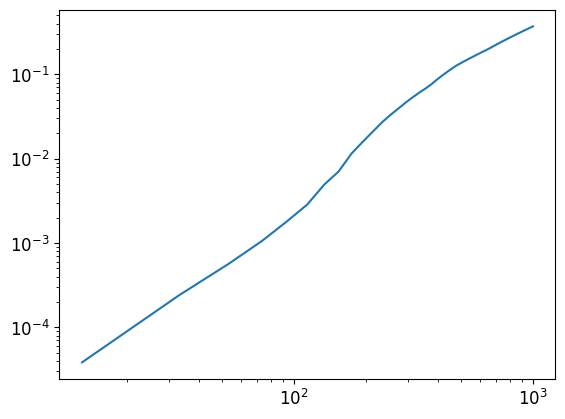

In [7]:
deepcore_energies = np.linspace(13, 1000)
plt.plot(deepcore_energies, a_eff_elec(deepcore_energies))
plt.xscale('log')
plt.yscale('log')

In [8]:
def get_icecube_upgrade_aeff_interp():
    energies = [
        1,
        1.1084814620992400,
        1.2841808758833600,
        1.476825128917860,
        1.6735634117049000,
        1.9246202366494300,
        2.399891973865270,
        3.0818953770237500,
        3.8147813307403400,
        4.791937909144930,
        5.844847212340260,
        7.342005347535290,
        8.88959118635194,
        11.084814620992400,
        13.322957391827200,
        16.370332781677700,
        19.820956145517300,
        26.602357640704200,
        36.50062655876910,
        50.824169128591500,
        63.37484831938590,
        73.42005347535290,
        88.24434847158740,
        106.06182736967200,
        134.2132914547650,
        167.3563411704900,
        201.14737854469500,
        258.30961676116700,
        310.46509442664400,
        378.6820856391960,
        472.19502355134300,
        555.1482123742930,
        643.141759233203,
        756.1261346134230,
        888.9591186351930,
        1007.3836274301600,
    ]
    
    aeffs = [
        0.0007742636826811290,
        0.001264304989484070,
        0.0024484367468222300,
        0.003998083423884910,
        0.006390804841860320,
        0.010215491323354900,
        0.017407673833302400,
        0.031622776601683800,
        0.04741611045635240,
        0.06812920690579620,
        0.0918254283565629,
        0.1291549665014880,
        0.17407673833302400,
        0.22967361763386400,
        0.27238625281248800,
        0.3443792984976990,
        0.3913745601980380,
        0.48437886495410400,
        0.5868383921470200,
        0.6812920690579620,
        0.6959733220132110,
        0.7909483932417860,
        0.9582558549602660,
        1.2376350284724800,
        1.436836683778830,
        1.668100537200060,
        1.8557459376156500,
        2.108987832143100,
        2.108987832143100,
        2.3462288481422600,
        2.5011984342945800,
        3.0302710828664000,
        3.095570795443490,
        2.9037750072735100,
        2.7238625281248800,
        3.230421999948910
    ]
    
    for i in range(len(aeffs)):
        aeffs[i] /= 10000 #converting cm^2 to m^2
    
    interpolation = interp1d(energies, aeffs, kind='linear')
    
    return interpolation

In [9]:
def get_total_interactions_upgrade(e_min, e_max):
    return quad(upgrade_integrand, e_min, e_max)[0]

In [10]:
ice_cube_upgrade_aeff_interp = get_icecube_upgrade_aeff_interp()

In [21]:
ice_cube_upgrade_aeff_interp(1)

array(7.74263683e-08)

In [11]:
def get_ibd_xs(energy): #GeVs
    energy *= 10 ** 3 # coverting to MeV
    xs = 10 ** -4 * (5 * 10 ** -44) * (energy ** 2) #m^2
    return xs

In [12]:
def make_super_k_integrand(energy):
    moon_solid_angle = 0.0000648
    nt = 1.5 * 10 ** 33
    flux = e_nue_flux(energy)
    return get_ibd_xs(energy) * flux * nt * moon_solid_angle

In [13]:
def make_eclipse_integrand(energy):
    nt = 1.5 * 10 ** 33
    flux = 10 ** 2 * 10 ** -4
    return get_ibd_xs(energy) * flux * nt

In [14]:
#returns differential cosmic ray flux
# units are
def cosmic_ray_flux(energy): #GeVs
    return 1.7 * 10 ** 4 * (energy ** -2.7) #/m^2/s/sr/GeV

In [15]:
def get_lunar_nue_flux(energy): #GeVs
    energy *= 10 # because then the cosmic ray will lose 90% of energy
    cosmic_rays_per_m2 = cosmic_ray_flux(energy) * 2 * np.pi
    r_moon = 1737 * 10 ** 3 # m
    sa_moon = 4 * np.pi * r_moon ** 2
    total_neutrinos = sa_moon * cosmic_rays_per_m2
    
    dist_moon_to_earth = 384400 * 10 ** 3 # m
    flux_at_earth = total_neutrinos / (4 * np.pi * dist_moon_to_earth ** 2)
    return flux_at_earth #/m^2/GeV/s

In [16]:
 def upgrade_integrand(energy): #GeVs
    return ice_cube_upgrade_aeff_interp(energy) * get_lunar_nue_flux(energy)

In [17]:
int = quad(upgrade_integrand, 1, 10)[0]

3.725647643557766e-09

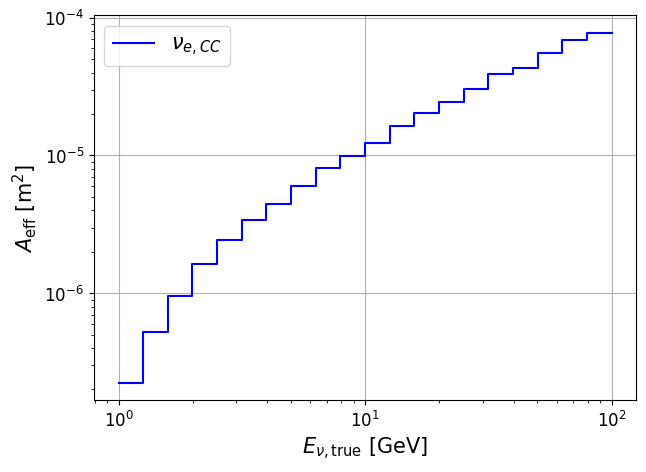

In [27]:
# Define path to file (you may need to change this to match your system)
input_file = "neutrino_mc.csv"

# Load the file using pandas
input_data = pd.read_csv(input_file)
# Defining a few useful thing sbefore we get started...

# Define some energy bins (used throughout this notebook)
energy_bins_fine = np.logspace(0., 2., num=21)
energy_bins_course = np.logspace(0., 2., num=11)

# Define masks to identify different neutrino flavors
nue_mask = (np.abs(input_data["pdg"]) == 12)
numu_mask = (np.abs(input_data["pdg"]) == 14)
nutau_mask = (np.abs(input_data["pdg"]) == 16)

# It is often desirable to seperate the neutrinos by flavor and interaction.
# It is common to consider all Neutral Current (NC) interactions together, as 
# there is no final state charged lepton with which to discriminate the different 
# neutrino flavors.
# Define masks to identify different flavor/interaction combinations.
nc_mask = input_data["current_type"] == 0
cc_mask = input_data["current_type"] == 1
nue_cc_mask = nue_mask & cc_mask
numu_cc_mask = numu_mask & cc_mask
nutau_cc_mask = nutau_mask & cc_mask
# Choosing nue CC events as an example
chosen_mask = nue_cc_mask

# Calc effective area
effective_area_hist, bin_edges = np.histogram(input_data["true_energy"][chosen_mask], weights=input_data["weight"][chosen_mask], bins=energy_bins_fine )
effective_area_hist /= 4. * np.pi # Normalise by solid angle (using the fully sky)
effective_area_hist /= np.diff(bin_edges) # Bin widths

# Plot
fig, ax = plt.subplots(figsize=(7,5))
ax.step( bin_edges, effective_area_hist.tolist()+[effective_area_hist[-1]], where="post", color="blue", label=r"$\nu_{e,CC}$" )
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$E_{\nu,\rm{true}}$ [GeV]")
ax.set_ylabel(r"$A_{\rm{eff}}$ [$\rm{m^2}$]")
ax.grid(True)
_ = ax.legend()

In [30]:
effective_area_hist[1]

5.192091246414269e-07